In [143]:
from matplotlib import pyplot as plt
import csv
import pyreadr
import numpy as np
import pandas as pd
#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d
import seaborn as sns

In [128]:
data = pyreadr.read_r("derived_data/covid.csv");

In [114]:
df = data[None]
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

In [115]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 500
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset.iloc[:,[1,2,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [121]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
data_subset['pcaone']= pca_result[:,0]
data_subset['pcatwo']= pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print(data_subset)

Explained variation per principal component: [0.61339413 0.36584402]
       sex patient_type intubed pneumonia  age diabetes copd asthma inmsupr  \
27241    2            1      97         2   29        1    2      2       2   
110403   1            1      97         2   28        2    2      2       2   
58023    1            1      97         2   40        2    2      2       2   
131862   1            2       1         1    0        2    2      2       2   
129839   2            2       2         2   63        2    1      2       2   
...     ..          ...     ...       ...  ...      ...  ...    ...     ...   
210635   2            1      97         2   54        2    2      2       2   
88610    2            1      97         2   40        2    2      2       2   
44710    2            1      97         2   46        2    2      2       2   
41774    1            1      97         2   35        2    2      2       2   
163386   1            1      97         2   41        2    2  

<ipython-input-121-2fa6c70d84b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['pcaone']= pca_result[:,0]
<ipython-input-121-2fa6c70d84b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['pcatwo']= pca_result[:,1]


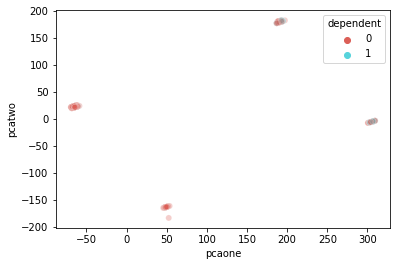

In [151]:
sns.scatterplot(
    x="pcaone", y="pcatwo",
    hue="dependent",
    palette=sns.color_palette("hls", 2),
    data=data_subset,
    legend="full",
    alpha=0.3
)
plt.savefig('figures/PCA.png', bbox_inches='tight')  

In [147]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.007s...
[t-SNE] Computed neighbors for 500 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 2.682275
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.452621
[t-SNE] KL divergence after 300 iterations: 0.182269


In [148]:
data_subset['tsne2done']= tsne_results[:,0]
data_subset['tsne2dtwo']= tsne_results[:,1]

<ipython-input-148-ad83d92052a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['tsne2done']= tsne_results[:,0]
<ipython-input-148-ad83d92052a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['tsne2dtwo']= tsne_results[:,1]


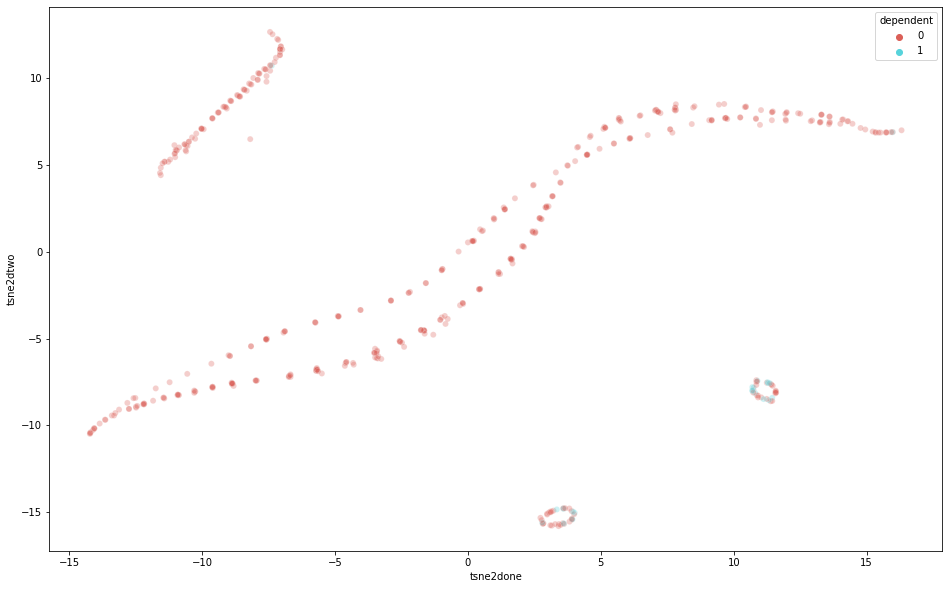

In [150]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne2done",
    y="tsne2dtwo",
    hue="dependent",
    palette=sns.color_palette("hls", 2),
    data=data_subset,
    legend="full",
    alpha=0.3
)
plt.savefig('figures/tSNE.png', bbox_inches='tight')  